## <center>Analyzing the Growth of Indian Startup</center>



 ![image](https://mk0cioeletsonli8u4uk.kinstacdn.com/wp-content/uploads/2019/11/indian-startup-eco-header.png)
 

In [1]:
# pandas for dataframe manipulation
import pandas as pd

# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] =(16,7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


import warnings

import sys

import datetime as dt

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read dataset
data = pd.read_csv("Startup_funding.csv")

In [3]:
# show head (top 5 row) of dataset
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
# changing column name of dataset
data.columns=["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvesterType", "AmountUSD", "Remarks"]

In [5]:
# head of datase after column name change
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvesterType,AmountUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
# printing shape of dataset
print("Size of data ",data.shape)

Size of data  (3044, 10)


In [7]:
# check null value in dataset
total = data.isnull().sum().sort_values(ascending=False)
total

Remarks             2625
AmountUSD            960
SubVertical          936
City                 180
IndustryVertical     171
InvestorsName         24
InvesterType           4
StartupName            0
Date                   0
SNo                    0
dtype: int64

In [8]:
# null value percent in each column of dataset
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
percent

Remarks             86.235217
AmountUSD           31.537451
SubVertical         30.749014
City                 5.913272
IndustryVertical     5.617608
InvestorsName        0.788436
InvesterType         0.131406
StartupName          0.000000
Date                 0.000000
SNo                  0.000000
dtype: float64

In [9]:
# null value with percentage
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent %"])
missing_data

,Total,Percent %
Remarks,2625,86.235217
AmountUSD,960,31.537451
SubVertical,936,30.749014
City,180,5.913272
IndustryVertical,171,5.617608
InvestorsName,24,0.788436
InvesterType,4,0.131406
StartupName,0,0.000000
Date,0,0.000000
SNo,0,0.000000


## Cleaning Data

In [10]:
# drop remark column
data = data.drop(["Remarks"], axis=1)

In [11]:
# convert AmountUSD column from string to float
def clean_amount(x):
    x = "".join([c for c in str(x) if c in ['0','1','3','4','5','6','7','8','9']])
    x = str(x).replace(',',"").replace("+","")
    x = str(x).lower().replace('undisclosed',"")
    x = str(x).lower().replace("n/a","")
    if x =="":
        x = "-999"
    return x
data["AmountUSD"] = data["AmountUSD"].apply(lambda x: float(clean_amount(x)))

In [12]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvesterType,AmountUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,0.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


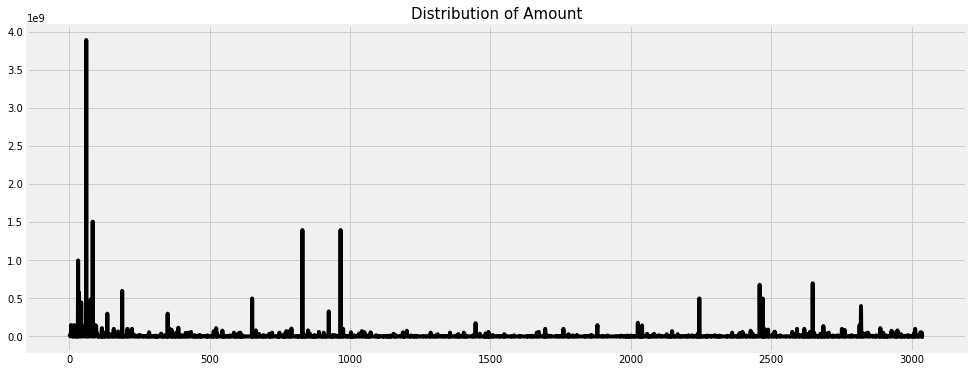

In [13]:
# ploting distribution graph of AmountUSD
plt.rcParams['figure.figsize'] = (15,6)
data["AmountUSD"].plot(kind="line", color='black')
plt.title("Distribution of Amount", fontsize=15)
plt.show()

In [14]:
# Cleanning Date column value with same format
data["Date"][data["Date"]=='12/05.2015'] = "12/05/2015"
data["Date"][data["Date"]=='13/04.2015'] = "13/04/2015"
data["Date"][data["Date"]=='15/01.2015'] = "15/01/2015"
data["Date"][data["Date"]=='22/01//2015'] = "22/01/2015"
data["Date"][data["Date"]=='05/072018'] = "05/07/2018"
data["Date"][data["Date"]=='01/07/015'] = "01/07/2015"
data["Date"][data["Date"]=='\\\\xc2\\\\xa010/7/2015'] = "10/07/2015"

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

In [15]:
# creating new column name yearmonth with year and month
data["yearmonth"] = (pd.to_datetime(data["Date"], format="%d/%m/%Y").dt.year*100)+(pd.to_datetime(data["Date"], format='%d/%m/%Y').dt.month)

In [16]:
temp = data["yearmonth"].value_counts().sort_values(ascending=False).head(10)

In [17]:
temp

201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64

In [18]:
year_month = data["yearmonth"].value_counts()

## Visualization

### * Ploting year-month distribution graph 

Text(0.5, 1.0, 'Year-Month distribution')

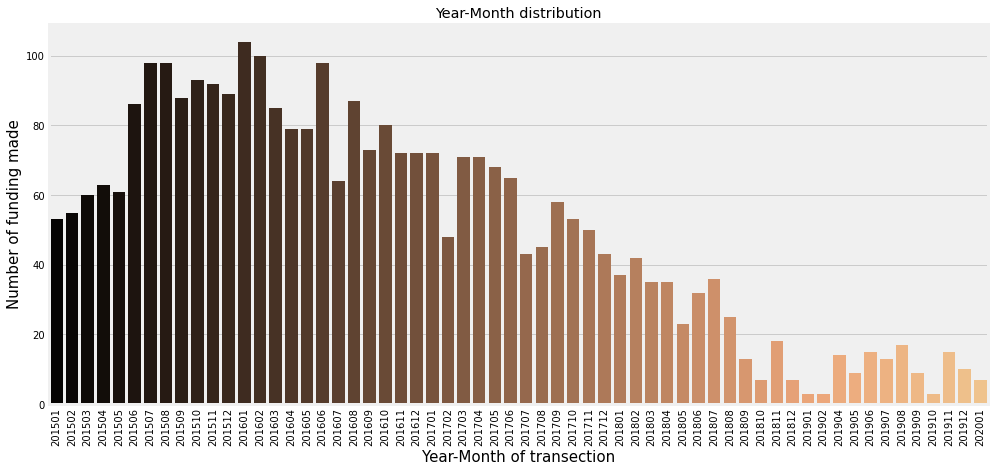

In [19]:
plt.rcParams["figure.figsize"] = (15,7)
sns.barplot(year_month.index, year_month.values, palette="copper")
plt.xticks(rotation=90)
plt.xlabel("Year-Month of transection", fontsize=15)
plt.ylabel("Number of funding made", fontsize=15)
plt.title("Year-Month distribution")

In [20]:
# Maximum amount invested 
print("Maximum funding to a startup is : ", data["AmountUSD"].max())

Maximum funding to a startup is :  3900000000.0


In [21]:
@interact
def check(column = "AmountUSD", x = 500000000):
    return data[data[column]>x].sort_values(by="AmountUSD", ascending =False)

interactive(children=(Text(value='AmountUSD', description='column'), IntSlider(value=500000000, description='x…

In [22]:
# Paytm total founding
data[data.StartupName == "Paytm"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvesterType,AmountUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [23]:
print("Minimum funding in statup : ", data["AmountUSD"].min())

Minimum funding in statup :  -999.0


In [24]:
# Total startup having no founding
data[data.AmountUSD == -999].shape

(967, 10)

In [25]:
data[["AmountUSD","StartupName"]].sort_values(by="AmountUSD", ascending=True).head()

,AmountUSD,StartupName
2022,-999.0,Bikxie
1877,-999.0,OneClickWash
1878,-999.0,Girnar Software
1883,-999.0,Smartron
858,-999.0,SmartCoin


In [26]:
print("On average Indian startup got funding of : ",data["AmountUSD"].mean())

On average Indian startup got funding of :  10296085.710578186


In [27]:
print("Total startup funded : ", len(data["StartupName"].unique()))

Total startup funded :  2459


In [28]:
print(data["StartupName"].value_counts().head())

Ola Cabs    8
Swiggy      8
Paytm       7
Medinfi     6
Nykaa       6
Name: StartupName, dtype: int64


### * Top 20 startup having heighest number of funding

In [29]:
startupname = data["StartupName"].value_counts().head(20)

Text(0.5, 1.0, 'Number of funding startup have')

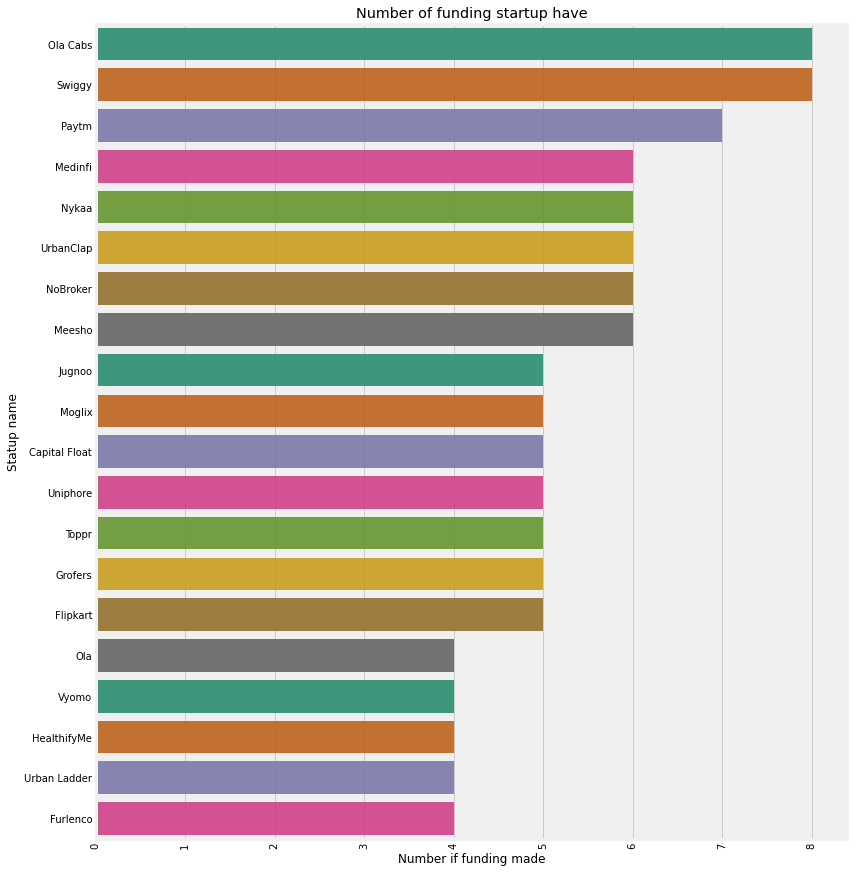

In [30]:
plt.rcParams["figure.figsize"] = (12,15)
sns.barplot(y = startupname.index, x =startupname.values, alpha=.9, palette="Dark2")
plt.xticks(rotation="vertical")
plt.ylabel("Statup name")
plt.xlabel("Number if funding made")
plt.title("Number of funding startup have")

### * Top 10 startup having Industry Vertical

In [31]:
# cleaning Industry Vertical 
data["IndustryVertical"] = data["IndustryVertical"].replace("nan", "Consumer Internet")

In [32]:
industr = data["IndustryVertical"].value_counts().head(10)

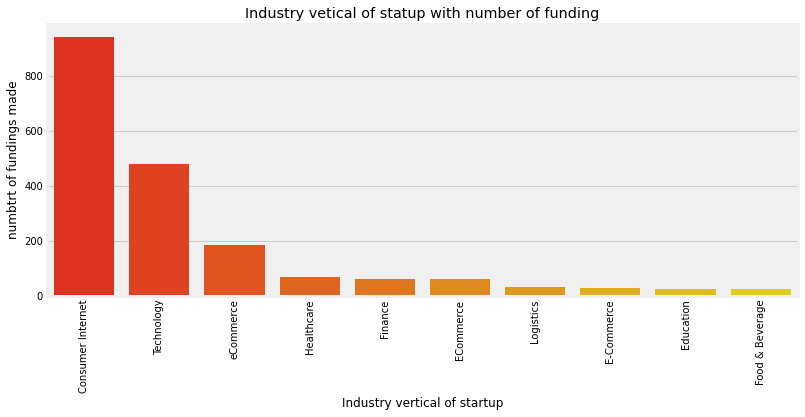

In [33]:
plt.rcParams["figure.figsize"] = (12,5)
sns.barplot(x =industr.index,y= industr.values, palette="autumn")
plt.xticks(rotation=90)
plt.xlabel("Industry vertical of startup")
plt.ylabel("numbtrt of fundings made")
plt.title("Industry vetical of statup with number of funding")
plt.show()

### * TOp 20 Sub vertical 

In [34]:
# cleaning data
data['SubVertical'] = data["SubVertical"].replace("Online lending platform","Online Lending Platform")
data['SubVertical'] = data["SubVertical"].replace("Online learning platform","Online Learning Platform")

In [35]:
industry = data["SubVertical"].value_counts().head(20)
industry

Online Lending Platform          16
Online Pharmacy                  10
Food Delivery Platform            8
Online Learning Platform          8
Online Lending                    5
Online Education Platform         5
Education                         5
Online Food Delivery              4
Non-Banking Financial Company     4
SaaS                              3
ECommerce Marketplace             3
Online Payment Gateway            3
Online Insurance Platform         3
Online Furniture Store            3
Online Food Delivery Platform     3
Logistics                         3
Fitness Mobile App                3
Agri-tech                         3
Online Gifting platform           3
Online Insurance Aggregator       3
Name: SubVertical, dtype: int64

Text(0.5, 1.0, 'Subvertical of startup with numer of funding')

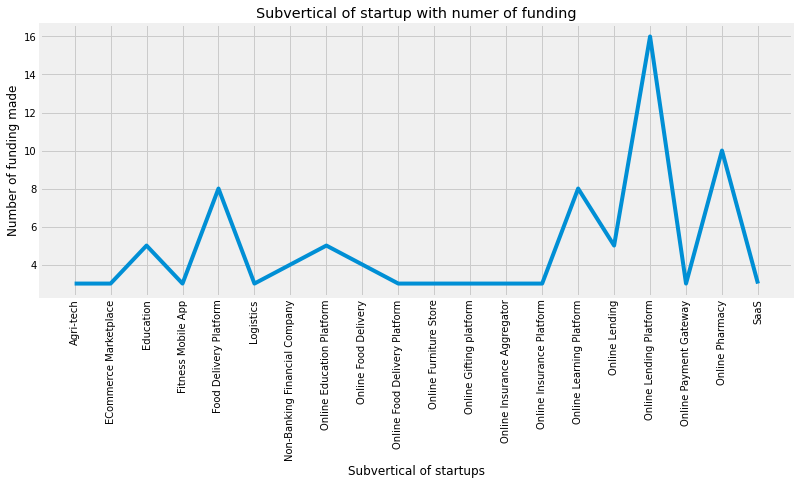

In [36]:

sns.lineplot(x=industry.index, y = industry.values, palette="winter" )
plt.xticks(rotation=90)
plt.xlabel("Subvertical of startups")
plt.ylabel("Number of funding made")
plt.title("Subvertical of startup with numer of funding")

### * Top 10 City preferred by the startup and invester

In [37]:
# Cleaning data
data["City"] = data["City"].replace(('Bengaluru', "nan"),("Bangalore","Bangalore"))
city = data["City"].value_counts().head(10)

In [38]:
city

Bangalore    841
Mumbai       567
New Delhi    421
Gurgaon      287
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      50
Ahmedabad     38
Name: City, dtype: int64

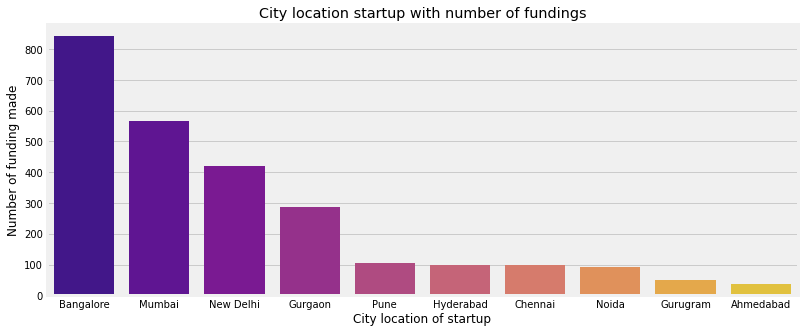

In [39]:
sns.barplot(x=city.index, y=city.values, palette="plasma")
plt.xlabel("City location of startup")
plt.ylabel("Number of funding made")
plt.title("City location startup with number of fundings")
plt.show()

### * Top 10 Inversters

In [40]:
data["InvestorsName"].value_counts()

Undisclosed Investors                                                               39
Undisclosed investors                                                               30
Ratan Tata                                                                          25
Indian Angel Network                                                                23
Kalaari Capital                                                                     16
                                                                                    ..
Murugappa Group, TVS Group, Vellayan Subbiah, Arathi Krishna, Arun Venkatachalam     1
Blacksoil Capital Pvt. Ltd                                                           1
Rajasthan Angel Investor Network                                                     1
Geniee, Inc, Purvi Capital                                                           1
Umang Moondra                                                                        1
Name: InvestorsName, Length: 2412, dtype: i

In [41]:
# cleaning data
data["InvestorsName"] = data["InvestorsName"].replace("Undisclosed investors","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("Undisclosed Investor","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("undisclosed Investor","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("undisclosed investor","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("Undisclosed","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("nan","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("undisclosed investors","Undisclosed Investors")
data["InvestorsName"] = data["InvestorsName"].replace("Un disclosed investors","Undisclosed Investors")


In [42]:
investors = data["InvestorsName"].value_counts().head(10)

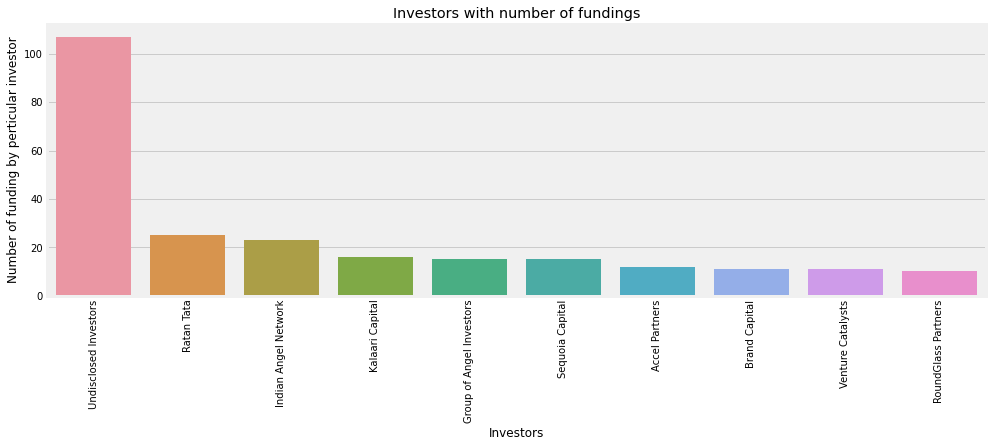

In [43]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(x = investors.index, y = investors.values)
plt.xlabel("Investors")
plt.ylabel("Number of funding by perticular investor")
plt.title("Investors with number of fundings")
plt.xticks(rotation=90)
plt.show()

### * Top 10 Type of Inverstment

In [44]:
data["InvesterType"] = data["InvesterType"].replace("PrivateEquity","Private Equity")
data["InvesterType"] = data["InvesterType"].replace("Seed / Angel Funding","Seed Angel Funding")
data["InvesterType"] = data["InvesterType"].replace("Angel / Seed Funding","Seed Angel Funding")
data["InvesterType"] = data["InvesterType"].replace("Seed/Angel Funding","Seed Angel Funding")
data["InvesterType"] = data["InvesterType"].replace("Seed/ Angel Funding","Seed Angel Funding")
data["InvesterType"] = data["InvesterType"].replace("Seed / Angel Funding","Seed Angel Funding")
data["InvesterType"] = data["InvesterType"].replace("Crowd funding","Crowd Funding")


In [45]:
data['InvesterType'].value_counts().head(10)

Private Equity        1357
Seed Funding          1355
Seed Angel Funding     138
Seed\\nFunding          30
Debt Funding            25
Series A                24
Series B                20
Series C                14
Series D                12
Seed Round               7
Name: InvesterType, dtype: int64

In [46]:
investertype = data["InvesterType"].value_counts().head(10)

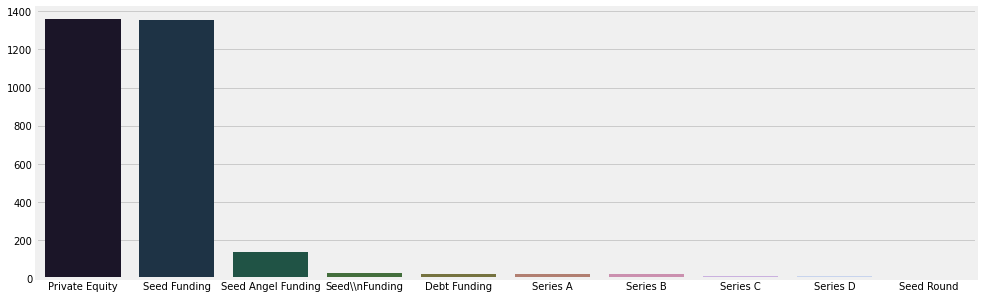

In [47]:
sns.barplot(x =investertype.index, y=investertype.values, palette="cubehelix")

## Conclusion
    * Startup whose Industry Vertical is Consumer Internet and Technology will have more chance to get investors.
    * Most preferred location start new startup Bangalore and Mumbai.
    * Online Lending Platform and Online Pharmacy are the most Sub Vertical 